In [1]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# load and pre-process the data
data = pd.read_csv( 'iris.data', header = None) # https://archive.ics.uci.edu/ml/datasets/Iris
z = data.to_numpy()
x = z[:,0:2].astype(float)
labels = z[:,-1]
y = np.array([i == 'Iris-setosa' for i in labels])
i0 = np.where( y == True)[0]
i1 = np.where( y == False)[0]
y = y.astype(int)

In [3]:
# train the lda model

# estimate parameters
u0 = np.mean( x[i0,:], axis = 0)
u1 = np.mean( x[i1,:], axis = 0)
sigma0 = np.cov( x[i0,:].transpose())
sigma1 = np.cov( x[i1,:].transpose())
sigma = 0.5*(sigma0 + sigma1)

# compute lda model
inv_sigma = np.linalg.pinv( sigma)
w = np.dot( u1-u0, inv_sigma)
b = 0.5*(np.dot(np.dot( u0, inv_sigma), u0) - np.dot(np.dot( u1, inv_sigma), u1))
prior0 = len(i0) / len(x)
prior1 = len(i1) / len(x)
c = np.log(prior0 / prior1)

# evaluate model
yhat = np.sign( np.dot( x, w) + b - c) > 0
yhat = yhat.astype(int)
error = np.mean(yhat == y)

In [4]:
error

0.006666666666666667

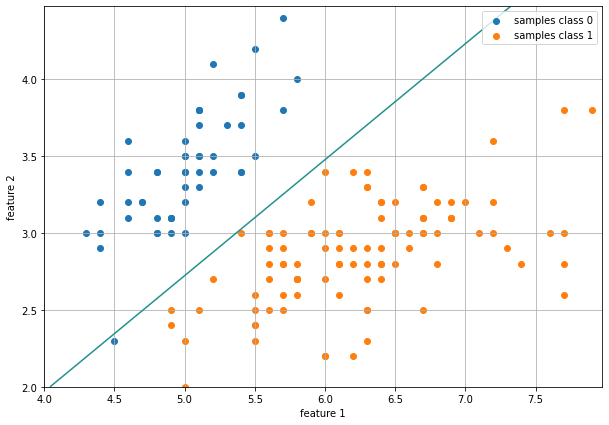

In [7]:
# plot data
plt.figure(figsize = (10,7))
plt.grid()
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.scatter( x[i0,0], x[i0,1])
plt.scatter( x[i1,0], x[i1,1])

# plot decision boundary
delta = 0.025
xrange = np.arange(4, 8, delta)
yrange = np.arange(2, 4.5, delta)
Xplot, Yplot = np.meshgrid(xrange,yrange)
Zplot = w[0]*Xplot + w[1]*Yplot + b - c
plt.contour(Xplot, Yplot, Zplot, 0)
plt.legend(['samples class 0', 'samples class 1', 'decision threshold'])